# Classical Simulation Of Grover's Algorithm

In [8]:
import math
import random
import matplotlib.pyplot as plt
plots = []

In [9]:
def superposition(qubits):
    states = []
    total_states = int(math.pow(2,qubits))
    amplitude = 1/math.sqrt(total_states)#Hadamard Transformation
    for _ in range(0,total_states):
        states.append(amplitude)
    return states

In [10]:
def grover_diffusion(states):
    average = sum(states)/len(states)
    for i in range(0,len(states)):
        states[i] = (average-states[i]) + average #inversion about mean
    return states


In [11]:
def oracle(states,datalist,key):

    for i in range(0,int(len(datalist))):
        if datalist[i] == key:
            states[i] *= -1 #phase inversion
    return states

In [12]:
def grover_search(qubits,datalist,key):
    states = superposition(qubits)
    num_iterations  = math.ceil(math.sqrt(math.pow(2,qubits)))
    probability_states = []
    for _ in range(0,num_iterations):
        states = oracle(states,datalist,key)
        states = grover_diffusion(states)
        probability_states = [states[i]*states[i] for i in range(0,len(states))]
        plots.append(probability_states)
    return probability_states

In [13]:
def grover(datalist,key):
    size_datalist = len(datalist)
    qubits_needed = math.ceil(math.log(size_datalist,2))
    paddings_required = int(math.pow(2,qubits_needed) - size_datalist)
    #required if the number of data items is not a power of 2.
    for _ in range(0,paddings_required):
         datalist.append(0)
    grover_search(qubits_needed,datalist,key)

[6, 18, 66, 96, 46, 19, 15, 75, 26, 57, 58, 40, 33, 72, 13, 97, 21, 55, 53, 54, 79, 90, 39, 68, 25, 4, 12, 71, 93, 84, 8, 44, 98, 65, 60, 27, 37, 2, 28, 61, 16, 77, 73, 34, 86, 10, 49, 5, 32, 64, 20, 50, 47, 45, 3, 94, 99, 24, 42, 88, 35, 82, 14, 29]
Following plots show the change in probabilities of items after every grover's iteration :
----------------------------------------------------------------------------------------------------------
Iteration  1 :


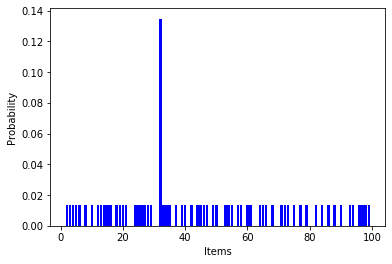

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
Iteration  2 :


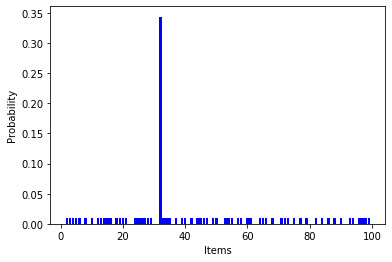

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
Iteration  3 :


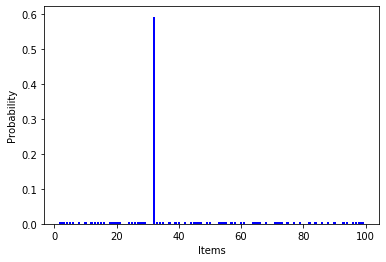

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
Iteration  4 :


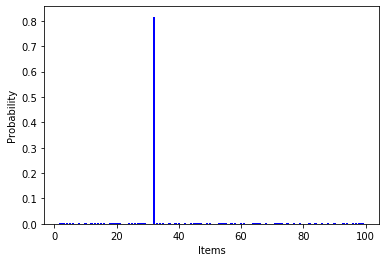

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
Iteration  5 :


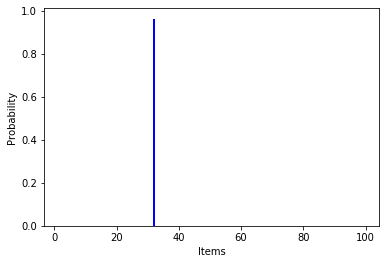

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
Iteration  6 :


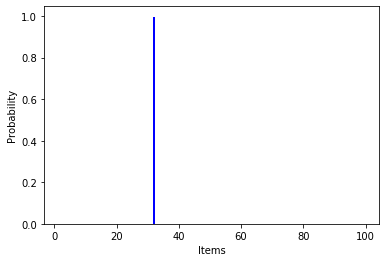

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
Iteration  7 :


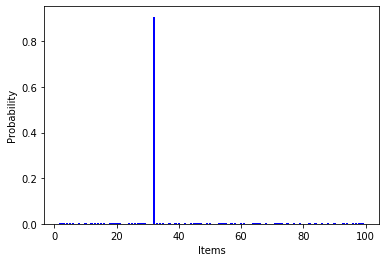

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
Iteration  8 :


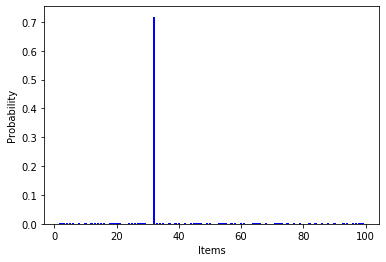

----------------------------------------------------------------------------------------------------------


In [14]:
datalist = random.sample(range(1, 100), 64)
grover(datalist,32)
print(datalist)
print("Following plots show the change in probabilities of items after every grover's iteration :")
result ={}
iteration = 1
for plot in plots:
    for i in range(len(plot)):
        result[datalist[i]] = plot[i]
    print("----------------------------------------------------------------------------------------------------------")
    print("Iteration ",iteration," :")
    plt.bar(result.keys(), result.values(),color='b') 
    plt.ylabel("Probability")
    plt.xlabel("Items")  
    plt.show()
    iteration +=1
    print("----------------------------------------------------------------------------------------------------------")